In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve


In [2]:
df = pd.read_excel('./data/信用卡精准营销模型.xlsx')

In [3]:
X = df.drop(columns='响应')
y = df['响应']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
clf = AdaBoostClassifier(random_state=123)
clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=123)

In [7]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
score = accuracy_score(y_pred, y_test)
score

0.85

In [8]:
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:, 1])

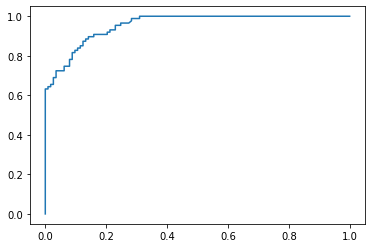

In [9]:
plt.plot(fpr, tpr)

In [10]:
df.head()

,年龄,月收入（元）,月消费（元）,性别,月消费/月收入,响应
0,30,7275,6062,0,0.833265,1
1,25,17739,13648,0,0.769378,1
2,29,25736,14311,0,0.556069,1
3,23,14162,7596,0,0.536365,1
4,27,15563,12849,0,0.825612,1


In [11]:
df = pd.read_excel('./data/产品定价模型.xlsx')

In [26]:
df.head()

,页数,类别,彩印,纸张,价格
0,207,技术类,0,双胶纸,60
1,210,技术类,0,双胶纸,62
2,206,技术类,0,双胶纸,62
3,218,技术类,0,双胶纸,64
4,209,技术类,0,双胶纸,60


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['类别'] = le.fit_transform(df['类别'])
df['纸张'] = le.fit_transform(df['纸张'])

In [13]:
df['类别'].value_counts()

1    336
2    333
0    331
Name: 类别, dtype: int64

In [14]:
X = df.drop(columns='价格')
y = df['价格']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=123)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=123)

In [38]:
model.predict(X_test)

array([ 71.15004038,  79.56199921,  68.21751792,  90.78788507,
        78.88479128,  42.28022702,  39.27334177,  60.74670841,
        53.59744659,  77.65931771,  80.22295545,  76.04437155,
        79.56199921,  58.40372895,  79.65245266,  44.27997693,
        53.18177447,  35.31452467,  92.1798291 ,  58.40372895,
        41.96644278,  99.50466356,  80.22295545,  79.69648341,
        91.45061741,  42.93885741,  42.86973046,  75.71824996,
        48.55203652,  62.94185778,  39.47077874,  61.54190648,
        95.18389309,  51.88118394,  65.1293139 ,  50.17577837,
        39.54495179,  83.63542315,  56.24632221, 102.1176112 ,
        48.89080247,  49.23639342,  33.03502962,  52.74862135,
        35.47220867,  35.00370671,  53.9446399 ,  74.62364353,
        35.31452467,  53.9446399 ,  85.74524927,  93.89523971,
        55.82739248,  78.08077497,  48.03849571,  85.29108924,
        32.18419915,  86.31575205,  81.60817964,  63.19774252,
        58.32824907,  83.94975776,  80.22295545,  73.14